<div style="text-align:center">
    <h1 style="color:blue;text-shadow: 2px 2px #E0E0E0">Projeto de Análise MyAnimeList</h1>
    <a href="https://www.kaggle.com/datasets/hamzaashfaque1999/myanimelist-scraped-data/" target="_blank">MyAnimeList Anime & Manga Dataset (July 2025)</a><br>
    <a href="https://github.com/Gregory280">Autor: Gregory280</a>
</div>

<p style="text-align:center">
    <b>Notebook 2 de 2<br>
    Análise Exploratória</b>
</p>

<h3 style="color:blue;text-shadow: 2px 2px #E0E0E0">
    Fonte de Dados
</h3>
<p>
    Conjunto de dados extraído de um banco de dados de animes e mangás conhecido como MyAnimeList.net.<br>
    Os dados extraídos são de animes e mangás disponíveis no site de até julho de 2025.<br>
    Contém dois arquivos .csv com um total de 105.983 entradas extraídas, sendo 28.635 entradas de anime e 77.348 entradas de mangá. 
</p>

<h3 style="color:blue;text-shadow: 2px 2px #E0E0E0">
    Pacotes Python
</h3>

In [1]:
!pip install -q -U watermark

In [2]:
!pip install -q missingno

In [93]:
# Pacotes utilizados
import datetime
import ast
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [4]:
%reload_ext watermark
%watermark -a "Gregory280"

Author: Gregory280



<h3 style="color:blue;text-shadow: 2px 2px #E0E0E0">
    Análise Exploratória
</h3>
<p>
    Esta etapa do processo ajuda a compreender como os dados estão organizados. O ideal seria aplica-lá antes e depois da etapa de pré-processamento, mas a caráter ilustratório irei aplicar uma vez e apenas nas principais variáveis de interesse.
</p>

In [5]:
# Carregamos a variável contendo o dataset tratado do notebook anterior
%store -r df_limpo

In [6]:
# Amostra
df_limpo.sample(3)

,id,link,title_name,score,scored_by,ranked,popularity,members,favorited,japanese_name,...,studios,source,genres,themes,demographic,duration,age_rating,scored_by_faixa,members_faixa,start_year
15305,45785,https://myanimelist.net/anime/45785/Tico__Shuq...,Tico: Shuqi de Weiji,NaN,0,15318.0,27535,78,0,缇可之暑期的危机,...,[],Original,[],[],Kids,15 min. per ep.,PG - Children,0,0-500,2010.0
3770,54103,https://myanimelist.net/anime/54103/Hikikomari...,Hikikomari Kyuuketsuki no Monmon,7.14,47012,3772.0,1958,124538,816,ひきこまり吸血姫の悶々,...,[Project No.9],Light novel,"[Comedy, Fantasy]",[Vampire],Unknown,23 min. per ep.,PG-13 - Teens 13 or older,Até 50.000,100.000-500.000,2023.0
5536,1760,https://myanimelist.net/anime/1760/Golgo_13,Golgo 13,6.79,8995,5521.0,5143,21242,78,ゴルゴ１３,...,[Tokyo Movie Shinsha],Manga,"[Action, Adventure, Drama]","[Adult Cast, Military]",Seinen,1 hr. 33 min.,R+ - Mild Nudity,Até 10.000,20.000-50.000,1983.0


<h3 style="color:blue;text-shadow: 2px 2px #E0E0E0">
    Geral
</h3>

In [7]:
# Descrevendo os dados numéricos
df_limpo[['score', 'scored_by', 'members']].describe()

,score,scored_by,members
count,18673.000000,2.863500e+04,2.863500e+04
mean,6.397852,1.954308e+04,3.875113e+04
std,0.890475,9.924774e+04,1.668734e+05
min,1.890000,0.000000e+00,1.800000e+01
25%,5.780000,0.000000e+00,2.350000e+02
50%,6.370000,3.080000e+02,1.082000e+03
75%,7.030000,3.294500e+03,9.187500e+03
max,9.300000,2.956009e+06,4.194641e+06


<p>
    Com podemos ter uma visão geral de certas informações como por exemplo o anime com a menor nota (sendo 1.89) e a maior nota (9.3) da plataforma e a média de notas dos animes é 6.3.
</p>

In [8]:
# Retorna o titulo e nota dos 10 animes mais maiores notas
df_limpo.nlargest(10, 'score')[['title_name', 'score']]

,title_name,score
0,Sousou no Frieren,9.30
1,Fullmetal Alchemist: Brotherhood,9.10
2,Steins;Gate,9.07
3,Shingeki no Kyojin Season 3 Part 2,9.05
4,Gintama: The Final,9.05
5,Gintama°,9.05
6,One Piece Fan Letter,9.04
7,Hunter x Hunter (2011),9.03
8,Ginga Eiyuu Densetsu,9.02
9,Gintama',9.02


<p>
    O anime mais bem avaliado dentro da plataforma até julho de 2025 era Sousou no Frieren com uma nota de 9.30.
</p>

In [9]:
# Retorna titulo e membros dos 10 animes com maiores membros
df_limpo.nlargest(10, 'members')[['title_name', 'members']]

,title_name,members
111,Shingeki no Kyojin,4194641
91,Death Note,4137032
1,Fullmetal Alchemist: Brotherhood,3547700
154,One Punch Man,3405752
186,Kimetsu no Yaiba,3282796
3351,Sword Art Online,3214257
986,Boku no Hero Academia,3190059
7,Hunter x Hunter (2011),3050800
675,Naruto,3012152
1110,Tokyo Ghoul,2964826


<p>
    O anime com mais membros dentro da plataforma até julho de 2025 era Shingeki no Kyojin com 4.194.641 de membros.
</p>

In [10]:
# Retorna titulo e scored_by dos 10 animes que mais foram avaliados
df_limpo.nlargest(10, 'scored_by')[['title_name', 'scored_by']]

,title_name,scored_by
111,Shingeki no Kyojin,2956009
91,Death Note,2896806
154,One Punch Man,2349475
186,Kimetsu no Yaiba,2253816
1,Fullmetal Alchemist: Brotherhood,2232236
3351,Sword Art Online,2229664
986,Boku no Hero Academia,2167207
675,Naruto,2073456
30,Kimi no Na wa.,2012448
130,Shingeki no Kyojin Season 2,1985522


<p>
    O anime que mais foi avaliado até julho de 2025 era Shingeki no Kyojin com 2.956.009 de notas.
</p>

<h4 style="color:blue;text-shadow: 2px 2px #E0E0E0">
    Percentis
</h4>

In [11]:
# Calcula os percentis da coluna score
percentis = df_limpo['score'].quantile([0.25, 0.5, 0.75])

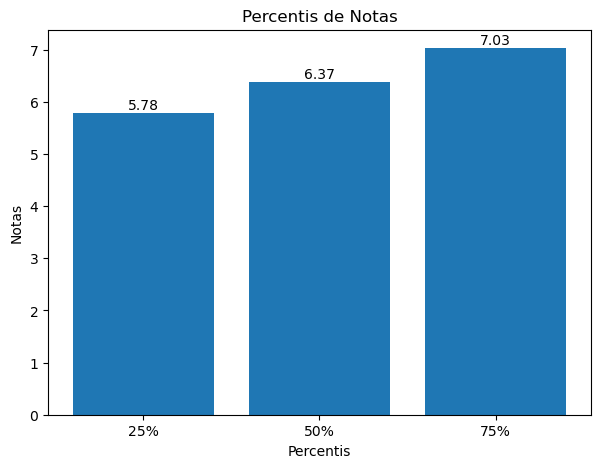

In [12]:
plt.figure(figsize=(7,5))
plt.bar(['25%', '50%', '75%'], percentis.values)
titulo = plt.title('Percentis de Notas')
plt.xlabel('Percentis')
plt.ylabel('Notas')
for i, v in enumerate(percentis.values):
    plt.text(i, v + 0.07, f"{v:.2f}", ha='center')
# Para salvar os gráficos
#plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>25% de todos os animes possuem uma nota inferior a 5.78.</li>
    <li>A nota 6.37 representa a mediana de notas.</li>
    <li>75% de todos os animes possuem uma nota inferior a 7.03.</li>
</ul>

In [13]:
# Calcula os percentis da coluna members
percentis = df_limpo['members'].quantile([0.25, 0.5, 0.75, 0.95])

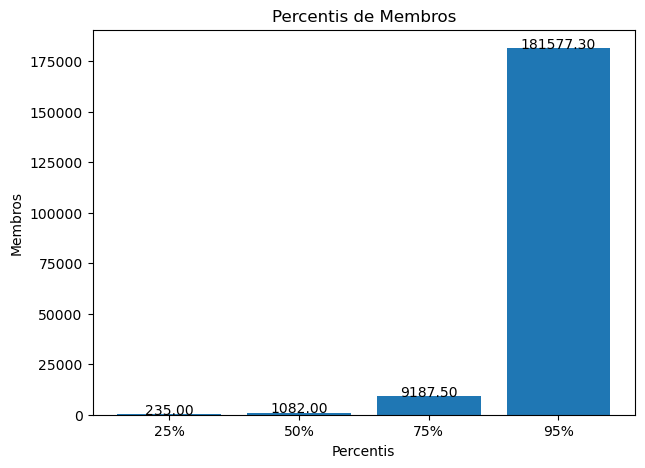

In [14]:
plt.figure(figsize=(7,5))
plt.bar(['25%', '50%', '75%', '95%'], percentis.values)
titulo = plt.title('Percentis de Membros')
plt.xlabel('Percentis')
plt.ylabel('Membros')
for i, v in enumerate(percentis.values):
    plt.text(i, v + 0.07, f"{v:.2f}", ha='center')
# Para salvar os gráficos
#plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        25% dos animes possuem quantidade de membros inferior a 235 membros.
    </li>
    <li>
        1082 é a mediana de membros.
    </li>
    <li>
        75% dos animes possuem menos que 9187 membros. Aproximadamente apenas 35% dos animes possuem membros acima de 10 mil membros.
    </li>
    <li>
        Apenas 5% dos animes possuem uma quantidade de membros maior que 181.577.
    </li>
    <li>
        A mediana distante do percentil 0.75 e extremamente longe do percentil 0.95 indica que a maior parte esmagadora dos animes é pouco popular (poucos membros).
    </li>
</ul>

<h4 style="color:blue;text-shadow: 2px 2px #E0E0E0">
    Distribuições
</h4>

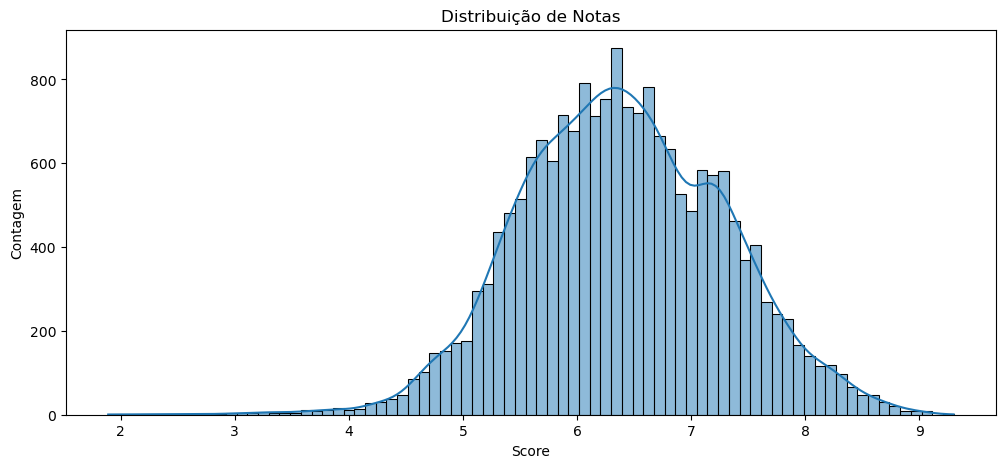

In [15]:
# Distribuições de Scores (notas dos animes)
plt.figure(figsize= (12, 5))
sns.histplot(df_limpo['score'], kde = True)
titulo = plt.title('Distribuição de Notas')
plt.xlabel('Score')
plt.ylabel('Contagem')
# Para salvar os gráficos
#plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        Percebemos que o pico da distribuição está na região dos 6.5, indicando que existem com notas 6.5 do que o restante.
    </li>
    <li>
        Pouquissímos animes possuem notas abaixo de 4,5. Animes muito ruins são bem menos avaliados comparado a animes muito bons.
    </li>
</ul>

<p>
    Vamos utilizar a coluna categórica sobre as quantidades de avaliações que os animes receberam que criamos para construir um gráfico countplot.
</p>

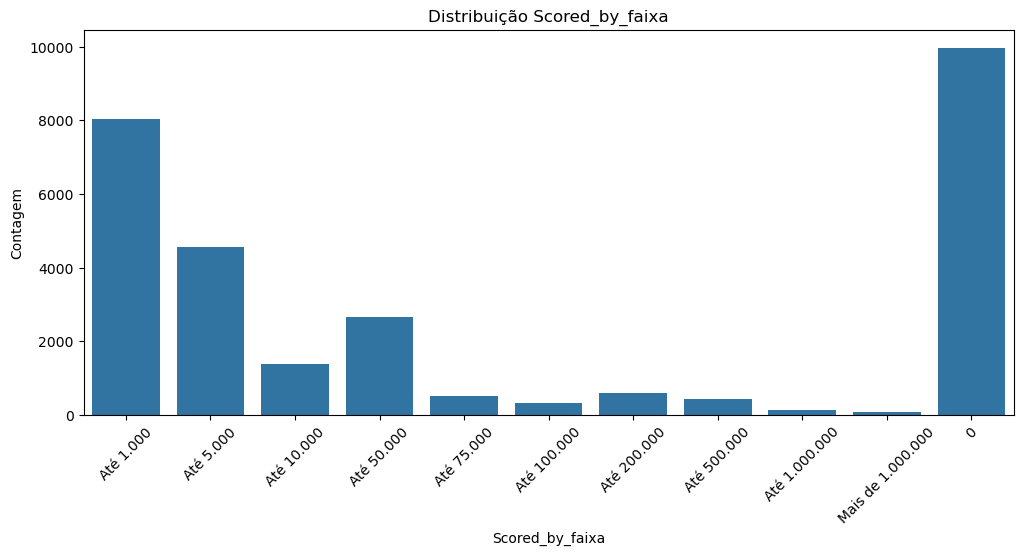

In [16]:
plt.figure(figsize=(12, 5))
sns.countplot(x='scored_by_faixa', data=df_limpo, order=df_limpo['scored_by_faixa'].cat.categories)
titulo = plt.title('Distribuição Scored_by_faixa')
plt.xlabel('Scored_by_faixa')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
# Para salvar os gráficos
#plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        Podemos notar que cerca de 10 mil animes não possuem qualquer tipo de avaliação dos usuários.
    </li>
    <li>
        A maioria dos animes possuem notas foram calculadas com até 1.000 avaliações de usuários. Isso indica que a maioria das notas dos animes da plataforma são notas fruto de poucas avaliações.
    </li>
    <li>
        São poucas pessoas que fazem questão de assistir e dar nota dentro da plataforma para todo anime que assiste.
    </li>
</ul>

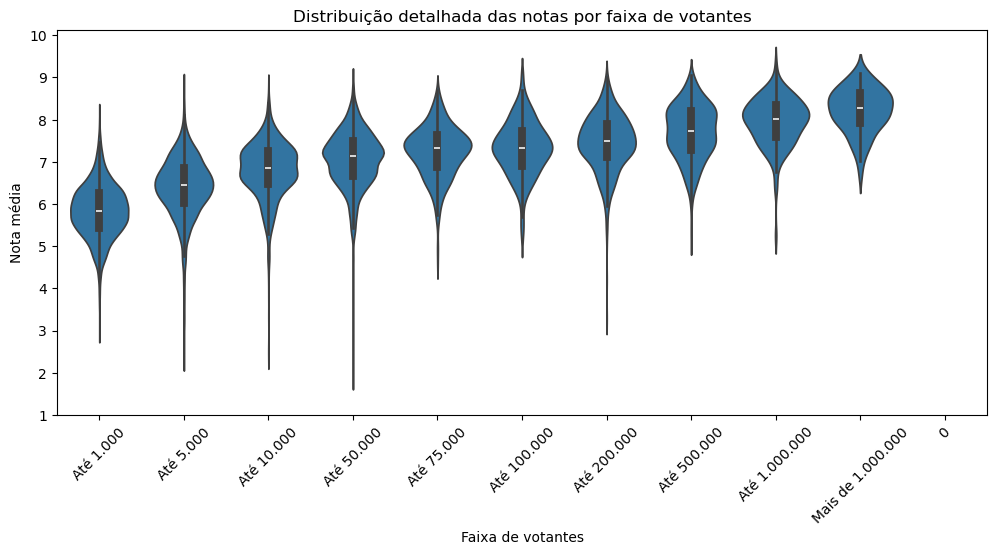

In [ ]:
plt.figure(figsize=(12, 5))
sns.violinplot(
    x='scored_by_faixa', 
    y='score', 
    data=df_limpo, 
    order=df_limpo['scored_by_faixa'].cat.categories
)
plt.xticks(rotation=45)
titulo = plt.title('Distribuição de Score por Scored_by')
plt.xlabel('Faixa Scored_By')
plt.ylabel('Nota média')
plt.yticks(np.arange(1, 11, 1))
# Para salvar os gráficos
#plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        Podemos identificar que os animes que são avaliados por <b>muita</b> gente (mais de 1 milhão de usuários) tendem a serem bem avaliados se comparado com o restante.
    </li>
    <li>
        Animes que foram avaliados por mais de 500 mil pessoas tem em sua maioria tem nota 8 e 8,5. 
    </li>
    <li>
        Podemos identificar os violinos das faixas <i>Até 1.000.000</i> e <i>Mais de 1.000.000</i> mais altos e largos em notas altas.
    </li>
    <li>
         Animes poucos conhecidos, que possuem poucas avaliações, geralmente tem nota 6.
    </li>
</ul>

<p>
    Para as colunas que representam estúdio, tema e gêneros iremos calcular a frequência com que aparecem no dataset.
</p>

In [18]:
# Calcula a frequência dos valores da coluna studios
frequencia_studios = Counter([studio for s in df_limpo['studios'] for studio in s])

In [19]:
# Cria um dataframe para armazenar o resultado
df_frequencia_studios = pd.DataFrame.from_dict(frequencia_studios, orient='index', columns=['frequencia'])

In [20]:
# Ordena pelo estudio mais frequente
df_frequencia_studios = df_frequencia_studios.sort_values(by='frequencia', ascending=False)

In [21]:
# Renomeia as colunas
df_frequencia_studios.reset_index(inplace=True)
df_frequencia_studios.rename(columns={'index':'estudio'}, inplace=True)

In [22]:
df_frequencia_studios.shape

(1269, 2)

<p>
    Foram encontrados <b>1.269 estúdios</b> únicos dentro dos registros.
</p>
<p>
    Para facilitar a análise iremos categorizar a quantidade de animes produzidas por faixas.
</p>

In [23]:
# Criando faixas baseada na quantidade de animes que cada estúdio pode ter
bins = [0, 1, 5, 10, 50, 100, np.inf]
labels = ['1', 'Até 5', 'Até 10', 'Até 50', 'Até 100', 'Mais de 100']

In [24]:
# Criando uma nova coluna com base nas faixas
df_frequencia_studios['freq_faixas'] = pd.cut(df_frequencia_studios['frequencia'], bins=bins, labels=labels, right=True, include_lowest=True)

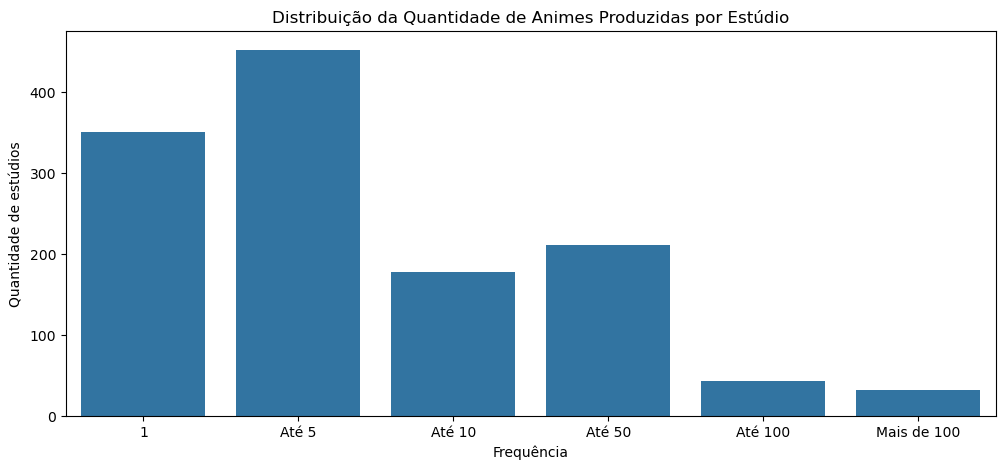

In [25]:
plt.figure(figsize=(12, 5))
sns.countplot(x='freq_faixas', data=df_frequencia_studios, order=df_frequencia_studios['freq_faixas'].cat.categories)
titulo = plt.title('Distribuição da Quantidade de Animes Produzidas por Estúdio')
plt.xlabel('Frequência')
plt.ylabel('Quantidade de estúdios')
# Para salvar os gráficos
#plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        Podemos constatar que a maioria dos estúdios possuem entre 1 a 5 animes produzidos.
    </li>
    <li>
        O número de estúdios que possuem entre 5 até 10 animes produzidos aparenta ser apenas a metade da quantidade de estúdios que produziram apenas 1 único anime.
    </li>
</ul>

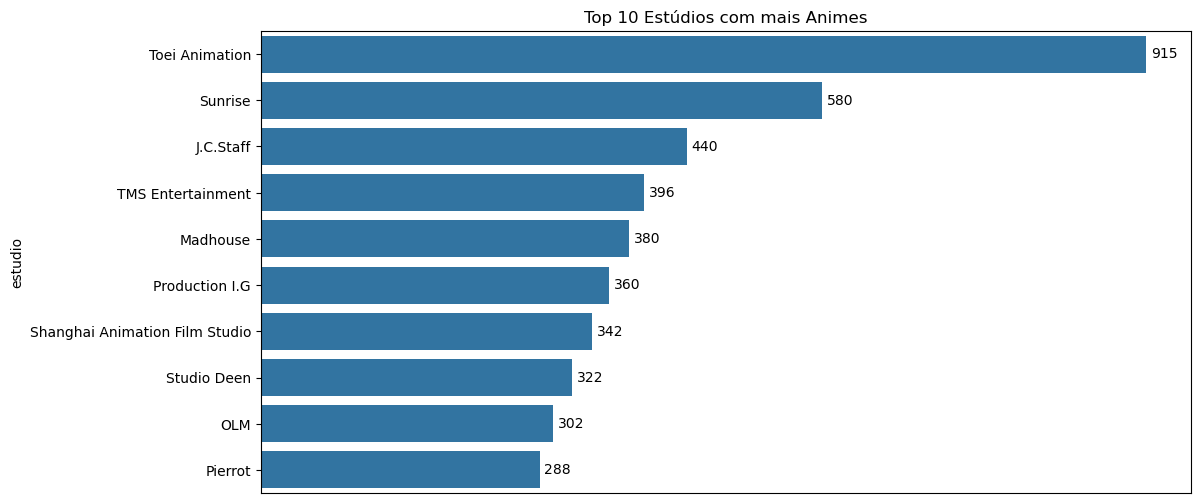

In [26]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df_frequencia_studios.head(10), x='frequencia', y='estudio')
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 5, p.get_y() + p.get_height()/2, int(width), va='center')
ax.xaxis.set_visible(False)
titulo = plt.title('Top 10 Estúdios com mais Animes')
# Para salvar os gráficos
#plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
         A Toei Animation é o estúdio com mais animes produzidos dentro dos 28635 mil animes extraídos do MAL e com muita folga. .
    </li>
    <li>
        O segundo estúdio com mais animes produzidos é Sunrise e possui pouco mais que a metade do total dos animes pela Toei
    </li>
</ul>

In [27]:
# Calcula a frequência dos valores da coluna themes
frequencia_themes = Counter([theme for t in df_limpo['themes'] for theme in t])

In [28]:
# Cria um dataframe para armazenar o resultado
df_frequencia_themes = pd.DataFrame.from_dict(frequencia_themes, orient='index', columns=['frequencia'])

In [29]:
# Ordena pelo mais frequente
df_frequencia_themes = df_frequencia_themes.sort_values(by='frequencia', ascending=False)

In [30]:
# Renomeia as colunas
df_frequencia_themes.reset_index(inplace=True)
df_frequencia_themes.rename(columns={'index':'tema'}, inplace=True)

In [31]:
df_frequencia_themes.shape

(52, 2)

<p>
    Foram encontrados <b>52 temas</b> diferentes.
</p>

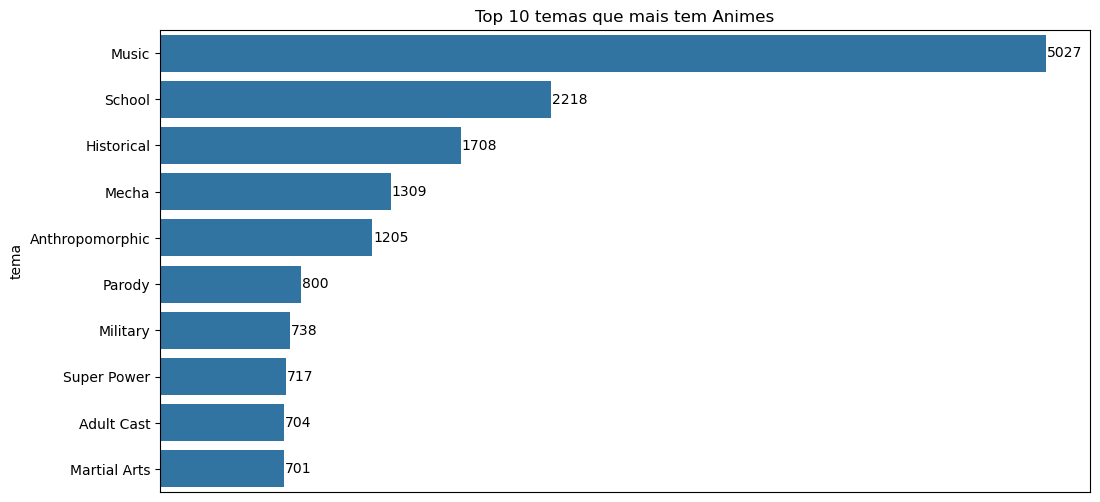

In [32]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df_frequencia_themes.head(10), x='frequencia', y='tema')
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 5, p.get_y() + p.get_height()/2, int(width), va='center')
ax.xaxis.set_visible(False)
titulo = plt.title('Top 10 temas que mais tem Animes')
# Para salvar os gráficos
#plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
         O tema músical está presente em mais de 5 mil animes, sendo o tema mais presente nos animes do MAL.
    </li>
    <li>
        Temos aproximadamente 7 vezes mais animes com tematica músical do que animes com temática de artes marciais.
    </li>
    <li>
        Em segundo lugar temos animes com tema escolar que são bem comuns e presentes em todas temporadas de animes.
    </li>
</ul>

<p>
    Vamos imprimir todos os temas existentes e suas respectivas quantidades de animes.
</p>

In [33]:
# Imprime todos os temas e a quantidade de animes que possui (frequencia) em ordem decrescente
df_frequencia_themes.style.bar(subset=['frequencia'], color='lightblue').hide(axis='index')

tema,frequencia
Music,5027
School,2218
Historical,1708
Mecha,1309
Anthropomorphic,1205
Parody,800
Military,738
Super Power,717
Adult Cast,704
Martial Arts,701


In [34]:
# Calcula a frequência dos valores da coluna genres
frequencia_genres = Counter([genre for g in df_limpo['genres'] for genre in g])

In [35]:
# Cria um dataframe para armazenar o resultado
df_frequencia_genres = pd.DataFrame.from_dict(frequencia_genres, orient='index', columns=['frequencia'])

In [36]:
# Ordena pelo mais frequente
df_frequencia_genres = df_frequencia_genres.sort_values(by='frequencia', ascending=False)

In [37]:
# Renomeia as colunas
df_frequencia_genres.reset_index(inplace=True)
df_frequencia_genres.rename(columns={'index':'genero'}, inplace=True)

In [38]:
df_frequencia_genres.shape

(21, 2)

<p>
    Foram identificados <b>21 gêneros</b> de anime diferentes.
</p>

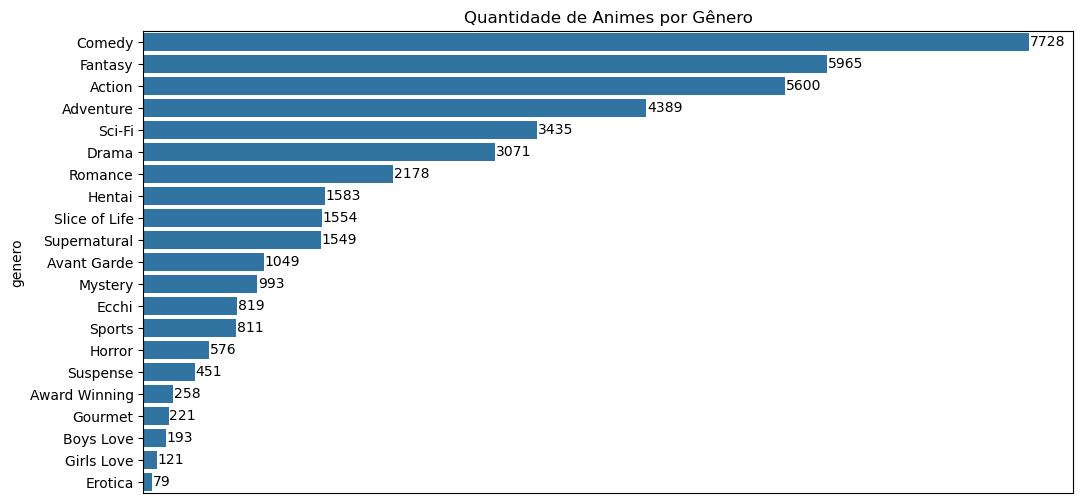

In [39]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df_frequencia_genres, x='frequencia', y='genero')
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 5, p.get_y() + p.get_height()/2, int(width), va='center')
ax.xaxis.set_visible(False)
titulo = plt.title('Quantidade de Animes por Gênero')
# Para salvar os gráficos
#plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        Animes de comédia são mais comuns em todo o catálogo.
    </li>
    <li>
        Os 3 gêneros mais comuns são Comédia, Fantasia, Ação, enquanto os 3 gêneros menos comuns são Boys Love, Girls Love e Erotica.
    </li>
</ul>

Vamos verificar quantos % os <b>3 gêneros mais frequentes</b> representam em relação a quantidade <b>total de animes</b>.

In [40]:
# Pega os 3 gêneros que aparecem mais
top_3_genres = df_frequencia_genres.head(3)

In [41]:
# Soma o total de frequência 
total_genres = df_frequencia_genres['frequencia'].sum()
# Faz a porcentagem dos 3 gêneros com mais frequência
porcentagem_top_3 = top_3_genres['frequencia'].sum() / total_genres * 100
# Imprime o resultado
print(f"Os 3 gêneros mais frequentes representam {porcentagem_top_3:.2f}% dos animes.")

Os 3 gêneros mais frequentes representam 45.26% dos animes.


In [42]:
# Porcentagem do restante tirando o top 3
porcentagem_restante = 100 - porcentagem_top_3

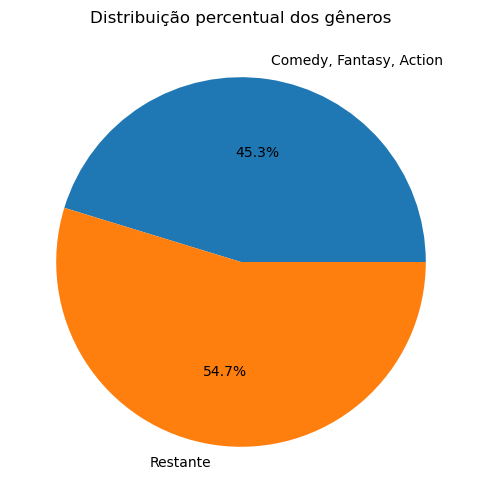

In [43]:
labels = ['Comedy, Fantasy, Action', 'Restante']
values = [porcentagem_top_3, porcentagem_restante]

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%.1f%%')
titulo = plt.title('Distribuição percentual dos gêneros')
# Para salvar os gráficos
#plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        Identificamos que os 3 gêneros mais comuns (Comédia, Fantasia e Ação) estão presentes em quase metade dos animes.
    </li>
</ul>

<p>
   Vamos calcular a <b>média</b> de notas de animes para <b>cada gênero</b>. 
</p>

In [44]:
# Separarmos os gêneros das listas para cada um ser representado em uma linha
df_limpo_exploded = df_limpo.explode('genres')

In [45]:
# Realizamos a média de nota por gênero
media_por_genero = df_limpo_exploded.groupby('genres')['score'].mean().sort_values(ascending=False)

In [46]:
# Renomeia as colunas
media_por_genero = media_por_genero.reset_index()
media_por_genero.columns = ['Genero', 'Media_Score']

In [47]:
# Visualizamos a média de nota por gênero
media_por_genero

,Genero,Media_Score
0,Award Winning,7.301211
1,Suspense,7.023657
2,Mystery,6.984262
3,Drama,6.853118
4,Romance,6.840798
5,Supernatural,6.744629
6,Action,6.718287
7,Adventure,6.703321
8,Sports,6.689283
9,Girls Love,6.618919


<ul>
    <li>
        O gênero Award Winning é destinado a obras que receberam prêmios, portante faz sentido ter uma média de nota maior que o restante.
    </li>
    <li>
        O gênero Suspense possui a maior média de nota. Apesar de não ser o gênero mais popular, é o mais bem avaliado dentro da plataforma.
    </li>
    <li>
        Animes com conteúdo sexual costuma ter notas abaixo de 6.4.
    </li>
</ul>

<p>
    Vamos construir a matriz de <b>coocorrências</b> de gêneros para descobrir quais gêneros <b>aparecem mais juntos</b>.
</p>

In [48]:
# Vamos criar uma matriz de coocorrências de gêneros
mlb = MultiLabelBinarizer()
generos_bin = mlb.fit_transform(df_limpo['genres'])
df_generos_bin = pd.DataFrame(generos_bin, columns=mlb.classes_)
matriz = df_generos_bin.T.dot(df_generos_bin)
matriz_triang = matriz.where(~np.triu(np.ones(matriz.shape)).astype(bool))
ocorrencias_generos = (matriz_triang.stack().loc[lambda s: s > 0].sort_values(ascending=False))

In [49]:
# Criando um dataframe para armazenar o resultado
df_pares_generos = ocorrencias_generos.reset_index()
df_pares_generos.columns = ['Gênero1', 'Gênero2', 'Ocorrências']

In [50]:
df_pares_generos.head(5)

,Gênero1,Gênero2,Ocorrências
0,Fantasy,Adventure,2248.0
1,Fantasy,Action,2009.0
2,Adventure,Action,1956.0
3,Sci-Fi,Action,1780.0
4,Fantasy,Comedy,1496.0


<ul>
    <li>
        Os gêneros de fantasia e aventura são os mais comuns em animes. Por pouca diferença temos os gêneros de fantasia e ação como segundo mais comum.
    </li>
</ul>

<p>
    Vamos descobrir quais são <b>gêneros mais comuns</b> que aparecem junto com o gênero de <b>comédia</b>.
</p>

In [51]:
# Pega o gênero comedy em qualquer posição do par
df_ocorrencias_comedy = df_pares_generos[
    (df_pares_generos['Gênero1'] == 'Comedy') |
    (df_pares_generos['Gênero2'] == 'Comedy')
]

In [52]:
df_ocorrencias_comedy.head(5)

,Gênero1,Gênero2,Ocorrências
4,Fantasy,Comedy,1496.0
5,Comedy,Action,1246.0
6,Comedy,Adventure,1232.0
7,Romance,Comedy,968.0
9,Sci-Fi,Comedy,869.0


<p>
    Estes são os 5 gêneros mais comuns que aparecem com comédia.<br>
    Vamos visualizar em gráfico para ficar melhor.
</p>

In [53]:
# Crio uma nova coluna para concatenar os gêneros
df_ocorrencias_comedy['Gêneros'] = df_ocorrencias_comedy['Gênero1'] + ' & ' + df_ocorrencias_comedy['Gênero2']
# Faço o drop das outras
df_ocorrencias_comedy.drop(['Gênero1', 'Gênero2'], axis=1, inplace=True)

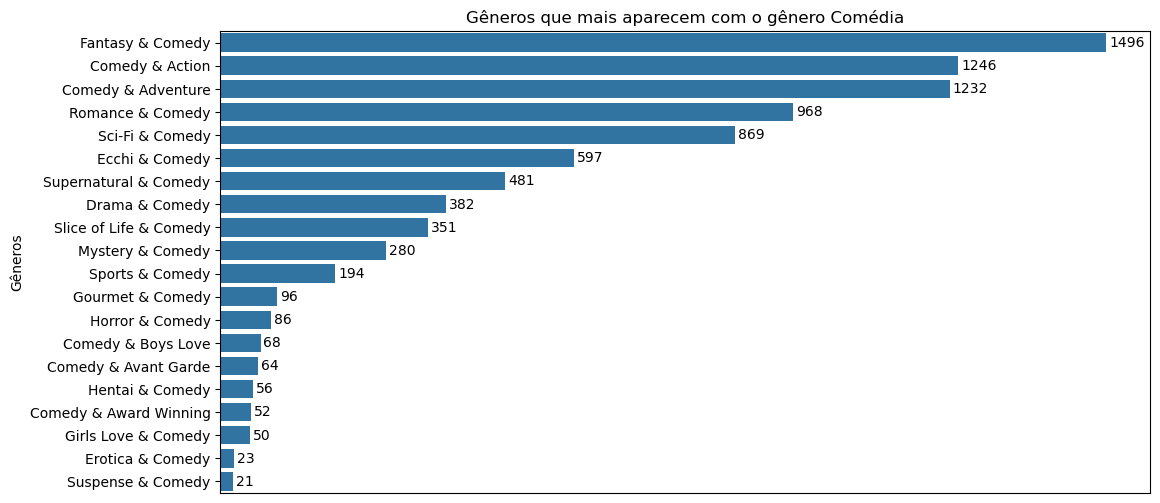

In [54]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df_ocorrencias_comedy, x='Ocorrências', y='Gêneros')
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 5, p.get_y() + p.get_height()/2, int(width), va='center')
ax.xaxis.set_visible(False)
titulo = plt.title('Gêneros que mais aparecem com o gênero Comédia')
# Para salvar os gráficos
#plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        Fantasia e Comédia são gêneros de animes bem comuns com certa folga.
    </li>
    <li>
        Em segundo lugar temos Comédia e Ação.
    </li>
    <li>
        Animes de comédia e suspense são os menos comuns.
    </li>
</ul>

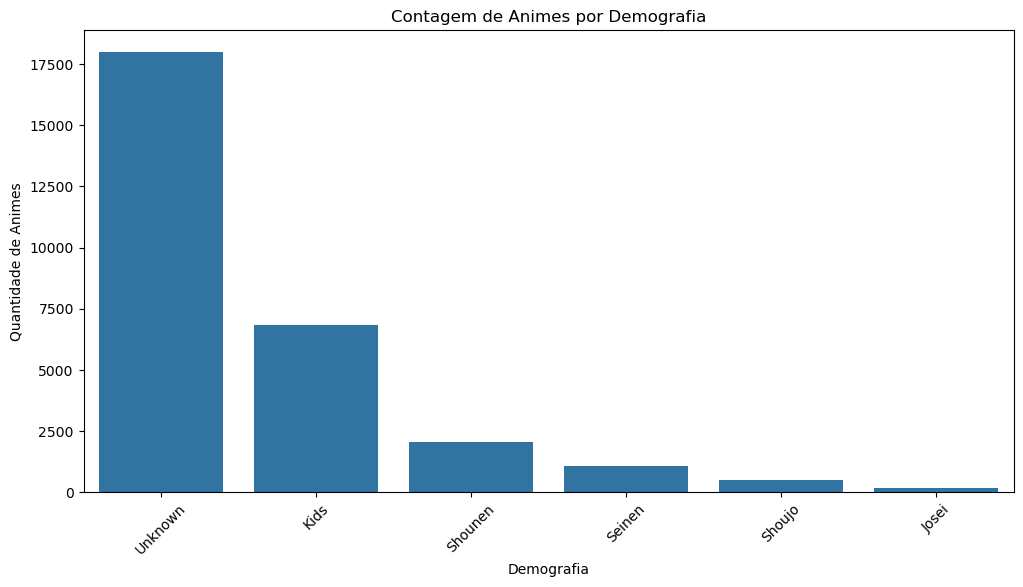

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_limpo, x='demographic', order=df_limpo['demographic'].value_counts().index)
titulo = plt.title('Contagem de Animes por Demografia')
plt.xticks(rotation=45)
plt.xlabel('Demografia')
plt.ylabel('Quantidade de Animes')
# Para salvar os gráficos
#plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        Podemos constar que na grande maioria dos registros não possui uma demografia informada. E a demografia que mais aparece na plataforma excluindo os valores desconhecidos é a demografia infantil.
    </li>
</ul>

<p>
    Vamos comparar a média de notas dos animes <b>shounen</b> com os animes <b>seinen</b>.
</p>

In [56]:
# Filtrar apenas os animes Shounen e Seinen
df_shounen_seinen = df_limpo[df_limpo['demographic'].isin(['Shounen', 'Seinen'])]

In [57]:
# Calcular a média de score por demografia
medias_shounen_seinen = df_shounen_seinen.groupby('demographic')['score'].mean().reset_index()

In [58]:
# Renomeia as colunas
medias_shounen_seinen.columns = ['Demographic', 'Media_Score']

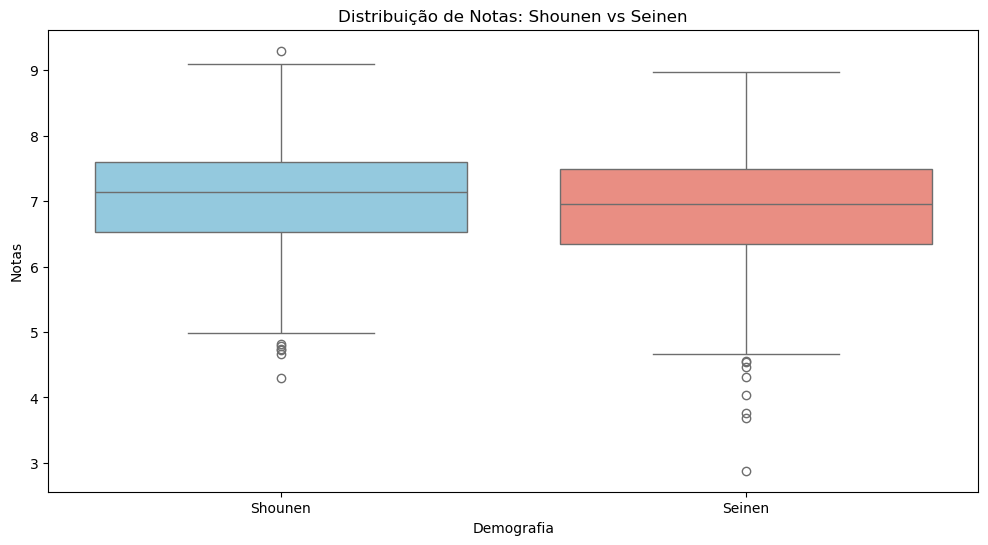

In [59]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_limpo[df_limpo['demographic'].isin(['Shounen', 'Seinen'])], x='demographic', y='score', palette=['skyblue','salmon'])
titulo = plt.title('Distribuição de Notas: Shounen vs Seinen')
plt.ylabel('Notas')
plt.xlabel('Demografia')
# Para salvar os gráficos
#plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        A nota média dos animes shounen é ligeiramente acima do que a nota de animes seinen.
    </li>
    <li>
        Notamos que existem mais animes seinen bem mal avaliados do que shounen, o que faz com que a média abaixe e fique menor do que a média de nota dos animes shounen
    </li>
</ul>

<p>
    Vamos verificar a distribuição dos animes por <b>material de origem</b>.
</p>

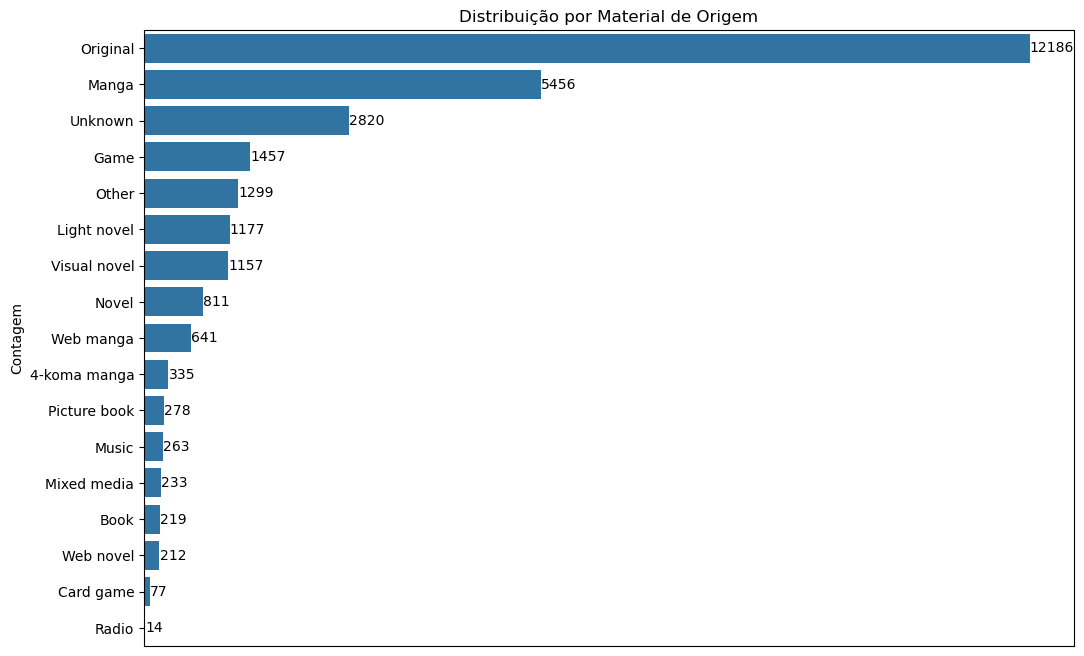

In [60]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df_limpo, y='source', order=df_limpo['source'].value_counts().index)
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height()/2, int(width), va='center')
titulo = plt.title('Distribuição por Material de Origem')
plt.xlabel('Material de Origem')
plt.ylabel('Contagem')
ax.xaxis.set_visible(False)
# Para salvar os gráficos
#plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        Em sua grande maioria temos bem mais animes originais do que adaptações de mangá.
    </li>
    <li>
        Temos mais animes de games do que light novels
    </li>
</ul>

<p>
    Vamos verificar a distribuição por <b>tipo de adaptação</b> (se é televisiva ou filme por exemplo).
</p>

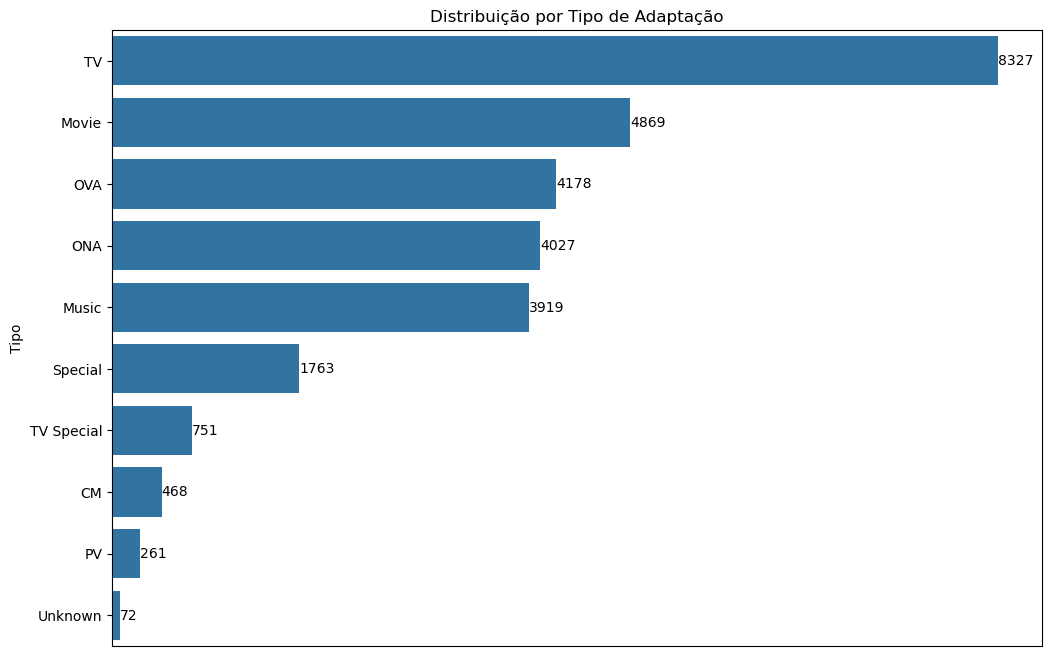

In [61]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df_limpo, y='item_type', order=df_limpo['item_type'].value_counts().index)
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height()/2, int(width), va='center')
titulo = plt.title('Distribuição por Tipo de Adaptação')
plt.ylabel('Tipo')
ax.xaxis.set_visible(False)
# Para salvar os gráficos
#plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
       Temos registrados 8327 animes no formato seriado televisivo e 4869 animes em filmes.
    </li>
</ul>

<p>
    Vamos separar os animes seriados pelas suas <b>quantidades de episódios</b>.
</p>

In [62]:
# Pega somente os animes onde item_type = TV
df_tv = df_limpo[df_limpo['item_type'] == 'TV']

In [63]:
# Cria as faixas de episódios
bins = [0, 12, 24, 50, 100, np.inf]
labels = ['Até 12', 'Até 24', 'Até 50', 'Até 100', 'Mais de 100']

In [64]:
# Cria a coluna com base nas faixas
df_tv['episodes_faixa'] = pd.cut(df_tv['episodes'], bins=bins, labels=labels, right=True, include_lowest=True)

In [65]:
# Realiza a contagem da frequência por faixa de episódios
tv_ep_freq = (df_tv['episodes_faixa'].value_counts())

In [66]:
# Converte em um dataframe
df_tv_ep_freq = tv_ep_freq.to_frame().reset_index()

In [67]:
# Renomeia as colunas
df_tv_ep_freq.columns = ['faixa_episodes', 'contagem']

In [68]:
df_tv_ep_freq

,faixa_episodes,contagem
0,Até 50,2327
1,Até 12,2307
2,Até 24,1603
3,Até 100,1363
4,Mais de 100,432


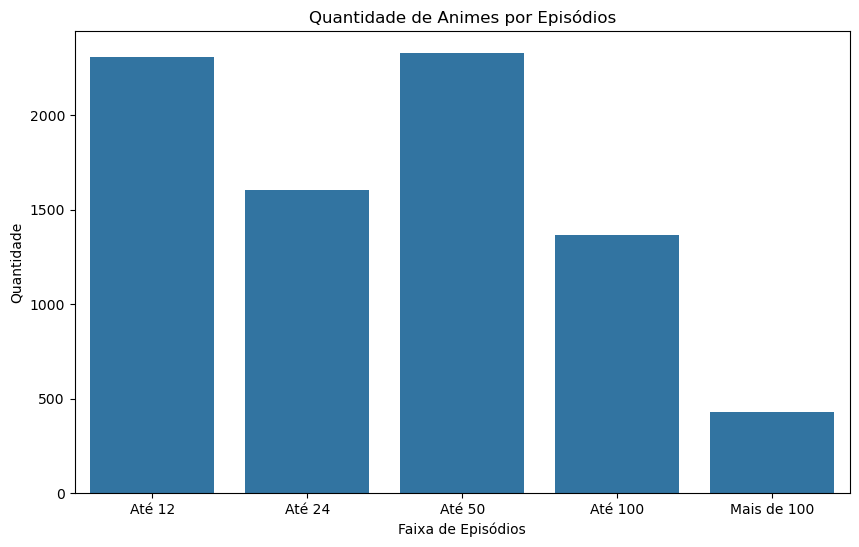

In [69]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_tv_ep_freq, x='faixa_episodes', y='contagem')
titulo = plt.title("Quantidade de Animes por Episódios")
plt.xlabel("Faixa de Episódios")
plt.ylabel("Quantidade")
# Para salvar os gráficos
#plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        A quantidade de animes que têm até 12 episódios tem aproximadamente a mesma quantidade de animes que têm até 50 episódios.
    </li>
    <li>
        Dentre 8.327 seriados de animes, apenas 432 possuem mais de 100 episódios.
    </li>
</ul>

<p>
    Vamos verificar a correlação entre a variável score (nota) e scored_by (quantida de pessoas que deram nota).
</p>
<ul>
    <li>
        Quanto mais próximo de 1, mais forte é a correlação positiva 
    </li>
    <li>
        Quanto mais próximo de -1, mais forte é a correlação negativa
    </li>
    <li>
        Próximo de 0 indica pouca ou nenhuma correlação
    </li>
</ul>
<p>
    Vamos calcular a matriz de correlação e depois visualizá-la em um mapa de calor:
</p>

In [70]:
# Cria a matriz de correlação
corr_matrix = df_limpo[['score', 'scored_by', 'members']].corr()

In [71]:
# Visualiza
corr_matrix

,score,scored_by,members
score,1.000000,0.347490,0.386699
scored_by,0.347490,1.000000,0.989199
members,0.386699,0.989199,1.000000


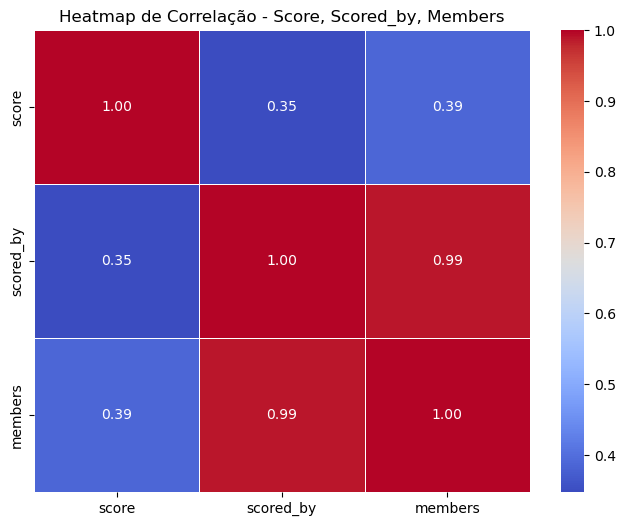

In [72]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
titulo = plt.title("Heatmap de Correlação - Score, Scored_by, Members")
#Para salvar os gráficos
#plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        A relação entre <b>nota</b> e <b>membros</b> é <b>positiva fraca</b> indicando que animes com mais membros tendem <b>levemente a ter notas melhores</b>.
    </li>
    <li>
        A relação entre <b>nota</b> e a <b>quantidade de avaliações</b> (scored_by) também é <b>positiva fraca</b>, indicando que quanto mais avaliações um anime tem, levemente <b>maior será a nota</b>. 
    </li>
    <li>
        A relação entre a <b>quantidade de avaliações</b> (scored_by) e <b>quantidade de membros</b> é <b>quase perfeita</b> (muito próxima de 1.0), indicando que todo anime que as pessoas adicionam à suas listas (watching, on hold, completed, droped, plan to watch) <b>são sempre depois avaliados com uma nota</b>.
    </li>
</ul>

In [73]:
# Contagem por ano
animes_por_ano = df_limpo['start_year'].value_counts().sort_values(ascending=False)

In [74]:
animes_por_ano = animes_por_ano.reset_index()
animes_por_ano.columns = ['Ano', 'Quantidade']

In [75]:
animes_por_ano.shape

(108, 2)

<p>
    Foram encontrados registros de animes em 108 anos diferentes.
</p>

In [76]:
# Anos com mais animes lançados
animes_por_ano.head(10)

,Ano,Quantidade
0,2017.0,1258
1,2021.0,1240
2,2022.0,1232
3,2016.0,1227
4,2019.0,1222
5,2018.0,1216
6,2023.0,1184
7,2020.0,1181
8,2024.0,1107
9,2015.0,1090


<p>
    O ano em que mais teve lançamento de anime foi o ano de <b>2017</b>, por apenas uma diferença de 18 animes entre o segundo colocado (ano 2021). 
</p>
<p>
    Os 10 anos com mais quantidade de animes lançado são todos da última década.
</p>

<p>
    Vamos construir um gráfico que mostre a quantidade de animes lançados nos últimos 15 anos.
</p>

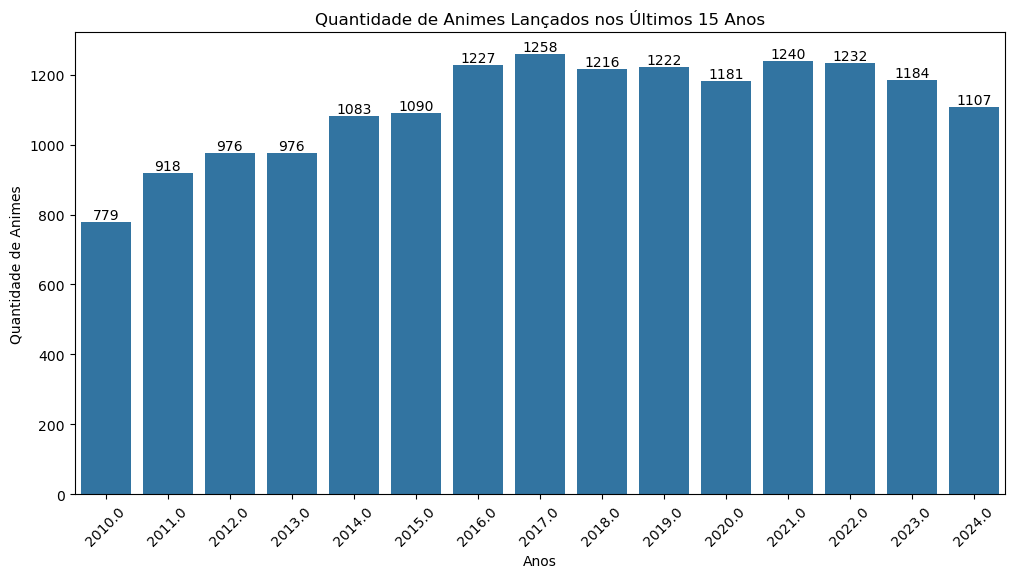

In [77]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=animes_por_ano.head(15).sort_values('Ano', ascending=False), x='Ano', y='Quantidade')
titulo = plt.title('Quantidade de Animes Lançados nos Últimos 15 Anos')
plt.xlabel('Anos')
plt.ylabel('Quantidade de Animes')
plt.xticks(rotation=45)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=10)
# Para salvar os gráficos
#plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        Percebe-se que começou uma tendência de queda a partir do ano de 2021.
    </li>
    <li>
        O ano de 2024 tem menos animes que o ano de 2016.
    </li>
</ul>

In [107]:
animes_por_ano_desc = animes_por_ano.sort_values('Ano', ascending=False).head(23)

In [108]:
animes_por_ano_desc['Variacao_Percentual'] = animes_por_ano_desc['Quantidade'].pct_change(periods=-1) * 100

In [109]:
animes_por_ano_desc['Variacao_Percentual'] = animes_por_ano_desc['Variacao_Percentual'].round(2)

In [110]:
animes_por_ano_desc = animes_por_ano_desc[animes_por_ano_desc['Ano'] <= datetime.datetime.now().year]

In [111]:
animes_por_ano_desc

,Ano,Quantidade,Variacao_Percentual
16,2025.0,687,-37.94
8,2024.0,1107,-6.50
6,2023.0,1184,-3.90
2,2022.0,1232,-0.65
1,2021.0,1240,5.00
7,2020.0,1181,-3.36
4,2019.0,1222,0.49
5,2018.0,1216,-3.34
0,2017.0,1258,2.53
3,2016.0,1227,12.57


<p>
    O ano de 2005 mostra NaN pois não há valor anterior a ele.<br>
    A variação percentual de 2025 apresentar -37% pois o dataset pega animes lançados até julho do ano de 2025.
</p>

<p>
    O ano de 2024 teve uma queda de -6.50% na quantidade de animes lançados em relação ao ano anterior (2023).<br>
    Em 2023 e 2022 a queda se repete, mas em menor dimensão. O último ano em que tivemos um aumento no lançamento de animes em relação ao ano anterior foi 2021.
</p>

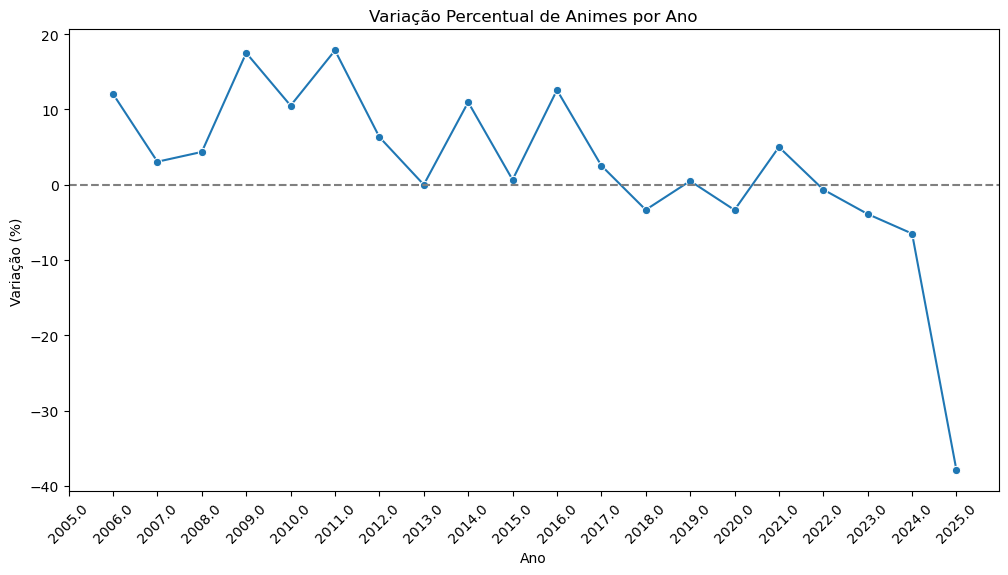

In [114]:
plt.figure(figsize=(12,6))
sns.lineplot(data=animes_por_ano_desc, x='Ano', y='Variacao_Percentual', marker='o')
plt.axhline(0, color='gray', linestyle='--')  # linha de referência 0%
titulo = plt.title('Variação Percentual de Animes por Ano')
plt.xlabel('Ano')
plt.ylabel('Variação (%)')
plt.xticks(ticks=animes_por_ano_desc['Ano'], labels=animes_por_ano_desc['Ano'], rotation=45)
# Para salvar os gráficos
#plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<p>
    O gráfico em linhas nos ajuda a visualizar essa variação percentual.
</p>
<p>
    Dentre os últimos 20 anos, a última vez que tivemos um aumento maior de 10% na quantidade de animes lançados no ano foi em <b>2016</b>.
</p>

<p>
    Vamos descobrir em qual ano que lançou mais animes do gênero Isekai.
</p>

In [115]:
# Cria uma máscara booleana: True se 'Isekai' estiver na lista de themes
mask_isekai = df_limpo['themes'].apply(lambda x: 'Isekai' in x if isinstance(x, list) else False)

In [116]:
df_isekai = df_limpo[mask_isekai]

In [123]:
animes_isekai_por_ano = df_isekai['start_year'].value_counts()

In [131]:
# Pega apenas os últimos 25 anos para não pouluir o gráfico
animes_isekai_por_ano = animes_isekai_por_ano[animes_isekai_por_ano.index >= datetime.datetime.now().year - 25 ]

In [ ]:
animes_isekai_por_ano

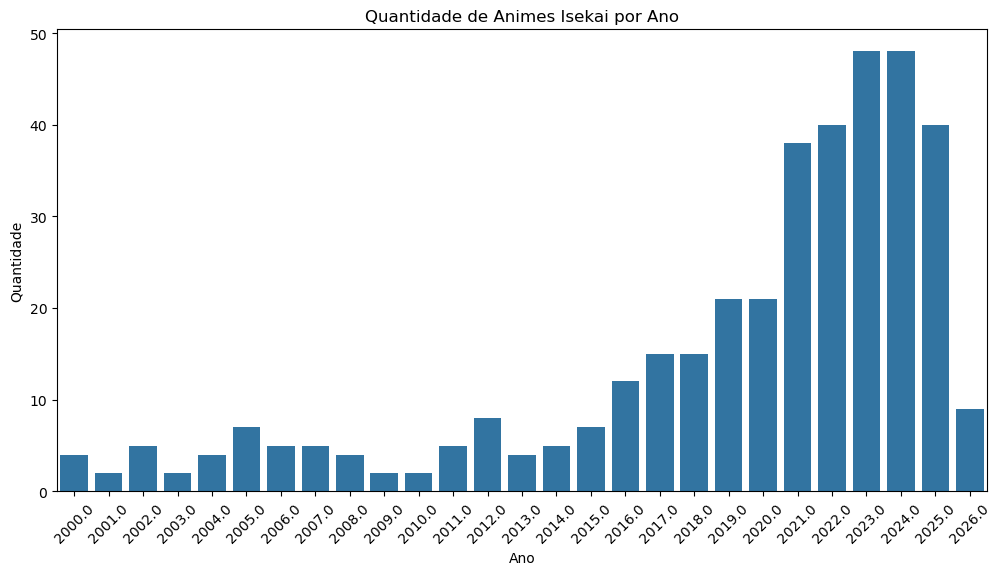

In [134]:
plt.figure(figsize=(12,6))
sns.barplot(x=animes_isekai_por_ano.index, y=animes_isekai_por_ano.values)
titulo = plt.title('Quantidade de Animes Isekai por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
# Para salvar os gráficos
#plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<h4 style="color:blue;text-shadow: 2px 2px #E0E0E0">
    Fim
</h4>

In [135]:
%watermark -a "Gregory280"

Author: Gregory280



In [136]:
%watermark --iversions

sklearn   : 1.6.1
missingno : 0.5.2
numpy     : 2.1.3
pandas    : 2.2.3
matplotlib: 3.10.0
seaborn   : 0.13.2

